In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def morlet_wavelet(t, w=5.0):
    # wavelet = np.exp(2j * np.pi * t) * np.exp(-t ** 2 / (2 * w ** 2))
    wavelet = np.exp(1j * w * t) * np.exp(-0.5 * t ** 2) * np.pi ** (-0.25)
    return wavelet

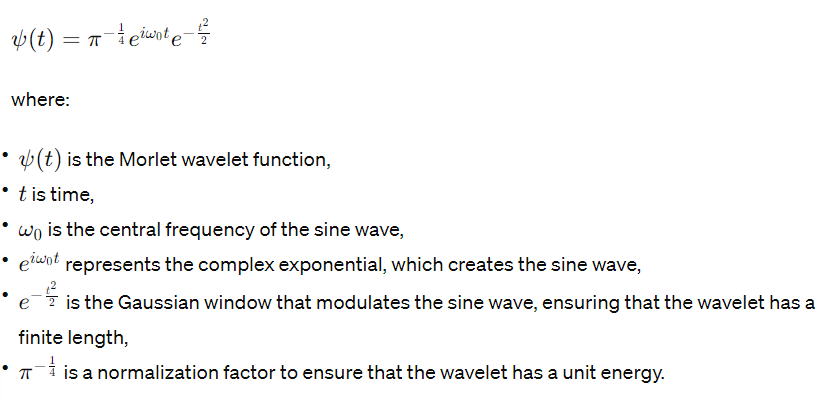

In [3]:
def cwt(signal, scales, wavelet_function, dt=1.0):
    output = np.zeros((len(scales), len(signal)), dtype=np.complex_)
    for i, scale in enumerate(scales):
        wavelet_data = wavelet_function(np.arange(-len(signal) / 2, len(signal) / 2) / scale) / np.sqrt(scale)* dt
        output[i, :] = np.convolve(signal, np.conj(wavelet_data), mode='same')
    return output

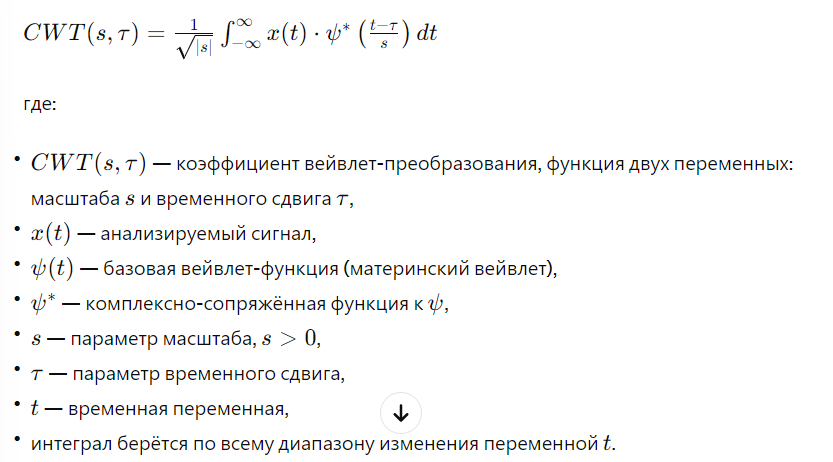

In [4]:
def icwt(cwt_coefficients, scales, wavelet_function, dt=1.0, ds = 1.0):
    reconstructed_signal = np.zeros(len(cwt_coefficients[0]))
    for i, scale in enumerate(scales):
        wavelet_data = wavelet_function(
            np.arange(-len(reconstructed_signal) / 2, len(reconstructed_signal) / 2) / scale) / np.sqrt(scale)* dt * ds
        contribution = np.convolve(cwt_coefficients[i, :], wavelet_data[::-1], mode='same')
        reconstructed_signal += np.real(contribution) / (scale**2)

    # Normalization factor
    factor_kernel = wavelet_function(np.arange(-len(reconstructed_signal) / 2, len(reconstructed_signal) / 2))
    reconstruction_factor = np.sum((np.abs(factor_kernel)) ** 2)
    return reconstructed_signal / reconstruction_factor

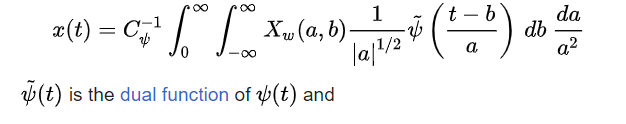
Для вейвлета Морле, благодаря его специфическим свойствам, в качестве дуальной функции обычно используется сам вейвлет Морле. Это связано с тем, что вейвлет Морле является своим собственным дуальным вейвлетом из-за его симметрии и особых свойств. Таким образом, в случае вейвлета Морле, обратное вейвлет-преобразование может быть выполнено с использованием той же функции, что и прямое вейвлет-преобразование.

Однако важно отметить, что вейвл

лет Морле не является ортогональным вейвлетом, и, строго говоря, он не имеет ортогональной дуальной функции в классическом смысле, который используется для вейвлетов с ортогональными или биортогональными свойствами. Несмотря на это, он все еще обладает свойствами, которые позволяют использовать его для обратного вейвлет-преобразования без необходимости определять отдельную дуальную функцию.

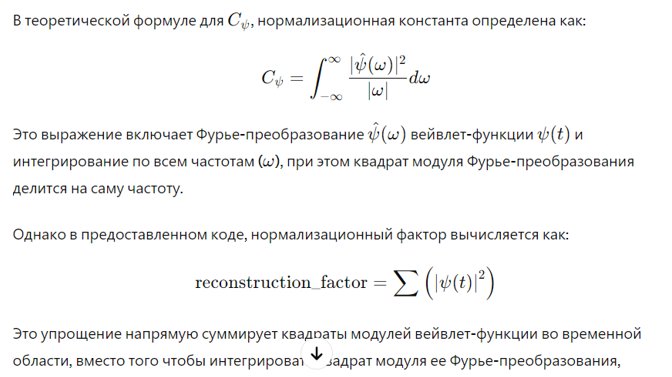
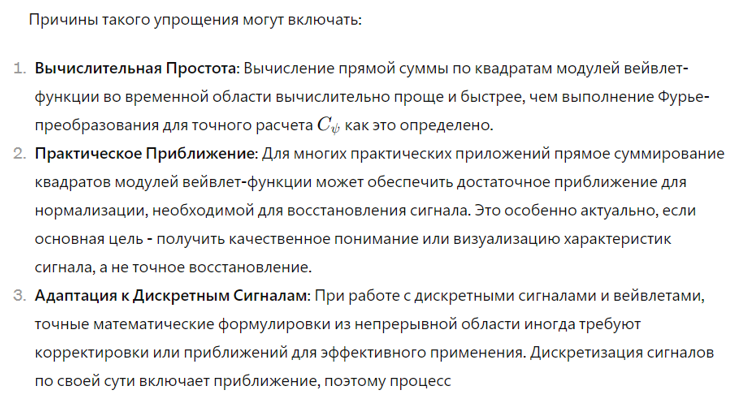

In [5]:
def generate_scales(dj, dt, N):
    s0 = 2*dt
    # Largest scale
    J = int((1 / dj) * np.log2(N * dt / s0))
    sj = s0 * 2 ** (dj * np.arange(0, J + 1))
    return sj

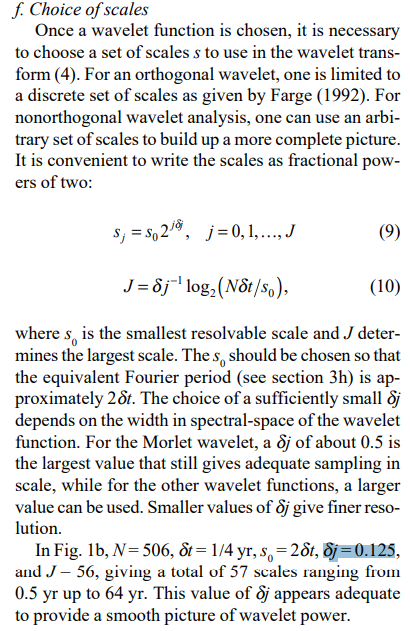


In [6]:
t = np.linspace(0, 5, 1000)
signal = np.sin(2 * np.pi * 5 * t) + np.sin(2 * np.pi * 10 * t) + np.sin(2 * np.pi * 8 * t) * 1

scales = generate_scales(0.125,5/1000,len(signal))
# scales = np.linspace(1, 30, 30)
print(scales)

cwt_coefficients = cwt(signal, scales, morlet_wavelet, dt = 1)
print(cwt_coefficients)
reconstructed_signal = icwt(cwt_coefficients, scales, morlet_wavelet, dt = 1, ds = 1)


[0.01       0.01090508 0.01189207 0.0129684  0.01414214 0.01542211
 0.01681793 0.01834008 0.02       0.02181015 0.02378414 0.02593679
 0.02828427 0.03084422 0.03363586 0.03668016 0.04       0.04362031
 0.04756828 0.05187358 0.05656854 0.06168843 0.06727171 0.07336032
 0.08       0.08724062 0.09513657 0.10374716 0.11313708 0.12337687
 0.13454343 0.14672065 0.16       0.17448124 0.19027314 0.20749433
 0.22627417 0.24675373 0.26908685 0.29344129 0.32       0.34896247
 0.38054628 0.41498866 0.45254834 0.49350746 0.53817371 0.58688259
 0.64       0.69792495 0.76109255 0.82997731 0.90509668 0.98701493
 1.07634741 1.17376518 1.28       1.3958499  1.52218511 1.65995463
 1.81019336 1.97402986 2.15269482 2.34753035 2.56       2.7916998
 3.04437021 3.31990926 3.62038672 3.94805971 4.30538965 4.6950607 ]
[[  0.        +0.j           0.        +0.j
    5.36934118+0.j         ... -14.64003025+0.j
  -10.36406452+0.j          -5.36934118+0.j        ]
 [  0.        +0.j           0.        +0.j
    5.1

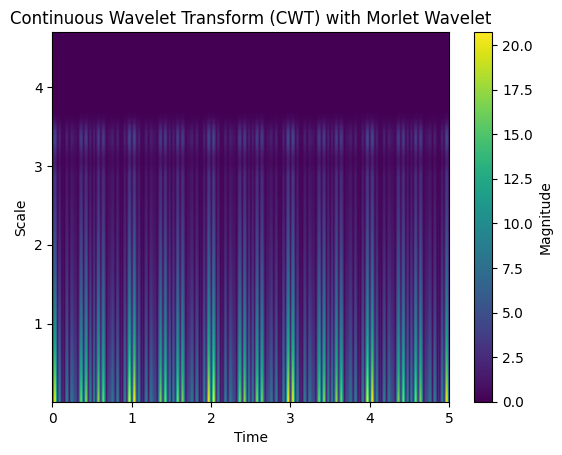

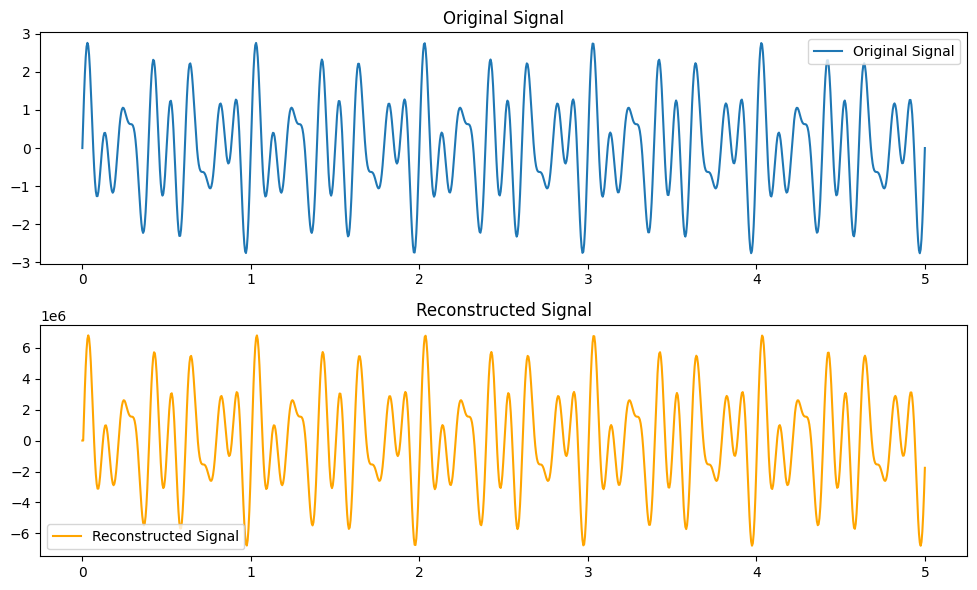

In [7]:
# Visualize the CWT coefficients
cwt_coefficients = cwt_coefficients[::-1, :]
plt.imshow(np.abs(cwt_coefficients), extent=[t[0], t[-1], scales[0], scales[-1]], aspect='auto', cmap='viridis')
plt.colorbar(label='Magnitude')
plt.xlabel('Time')
plt.ylabel('Scale')
plt.title('Continuous Wavelet Transform (CWT) with Morlet Wavelet')
plt.show(block = False)

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t, signal, label='Original Signal')
plt.legend()
plt.title('Original Signal')

plt.subplot(2, 1, 2)
plt.plot(t, reconstructed_signal, label='Reconstructed Signal', color='orange')
plt.legend()
plt.title('Reconstructed Signal')

plt.tight_layout()
plt.show()